In [1]:
import lxml.html
import lxml.etree

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def parse_file(filename):
    doc=lxml.html.parse(filename)
    table=doc.findall('//table')[0]
    rows=table.findall('./tr')
    num_rows=len(rows)
    data=np.zeros((num_rows,1+10+39), dtype=np.int64)
    for i,row in enumerate(rows):
        data[i,0]=int(row.xpath('./td/b')[0].text)
        data[i,1:]=[int(x.text) for x in row.xpath('./td')[1:-1]]
    return data

In [4]:
parse_file('raw/11.html')

array([[50130,  1704,  1686, ...,    11,     1,     3],
       [50131,  2148,  2109, ...,    19,     0,     9],
       [50134,   222,   225, ...,     0,     1,     0],
       ..., 
       [51671,   342,    64, ...,     3,     0,     0],
       [51672,   156,    57, ...,     1,     1,     0],
       [51675,   318,   336, ...,     0,     0,     0]])

In [5]:
all_data=np.zeros((0,1+10+39), dtype=np.int64)
for i in range(11,227):
    try:
        region = parse_file('raw/{}.html'.format(i))
    except:
        print ("Skipping region", i)
    all_data=np.concatenate((all_data,region))

Skipping region 41
Skipping region 42
Skipping region 43
Skipping region 44
Skipping region 53
Skipping region 54
Skipping region 55
Skipping region 56
Skipping region 61
Skipping region 104
Skipping region 108
Skipping region 109
Skipping region 110
Skipping region 111
Skipping region 224
Skipping region 225


In [6]:
all_data.shape

(30491, 50)

In [7]:
have_votes=np.where(all_data[:,9]>0)

np.sum(all_data[:,1:], axis=0)

array([31116601, 30672192,   702892, 11831345, 18676767,   608751,
       19285545,     3094, 19284534,   229577,    33341,    27665,
          34631,    19230,  2325311,    22955,     6048,   838280,
           5922,  1308062,     4696,    19614,     9859,  5840816,
          15554,    16155,     6014,     4522,   305748,     9256,
           4684,    20679,  1036664,    13628,    43229,     2673,
           5641,     3295,    16063,  3071460,     5664,    15304,
        1146190,     5421,    20038,  2545533,   118462,    18679,   107678])

In [8]:
VOTED=all_data[have_votes,9].flatten()
Z=all_data[have_votes,24].flatten()
P=all_data[have_votes,40].flatten()
T=all_data[have_votes,46].flatten()

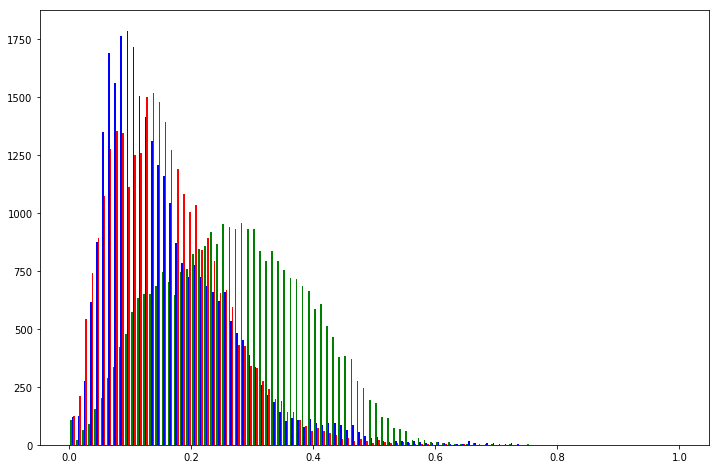

In [9]:
plt.figure(figsize=(12, 8))
plt.hist([Z/VOTED, P/VOTED, T/VOTED], bins=100, range=(0,1),
         color=['g','b','r'], label=['Z','P','T'],
        );

In [10]:
from scipy.stats import beta

In [11]:
def make_beta(d):
    a,b = beta.fit(np.extract(np.logical_and(0<d, d<1), d), floc=0,fscale=1)[:2]
    return a,b

In [12]:
aZ,bZ=make_beta(Z/VOTED)
print(aZ,bZ)
aP,bP=make_beta(P/VOTED)
print(aP,bP)
aT,bT=make_beta(T/VOTED)
print(aT,bT)

3.39310089549 9.06196479465
2.29142689669 12.0097366739
2.53913823627 13.3704426059


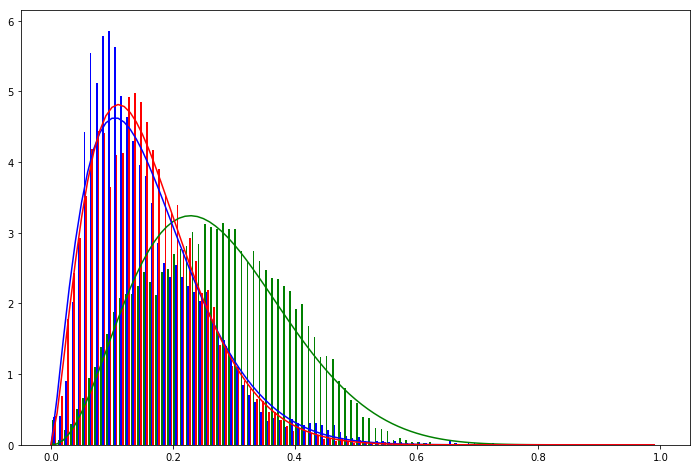

In [13]:
xs=np.arange(0,1,0.01)
plt.figure(figsize=(12, 8))
plt.hist([Z/VOTED, P/VOTED, T/VOTED], bins=100, range=(0,1), normed=True,
         color=['g','b','r'], label=['Z','P','T'],
        )
plt.plot(xs, beta.pdf(xs,aZ,bZ), 'g',
         xs, beta.pdf(xs,aP,bP), 'b',
         xs, beta.pdf(xs,aT,bT), 'r');